<a href="https://colab.research.google.com/github/chelangatspecioza2001/calculator-project/blob/main/coffee_leave_research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive  # Import the drive module

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# List the contents of the 'coffee dataset' folder
!ls /content/drive/MyDrive/coffee\ dataset


'coffee leave abstract.gdoc'  'Health leaves'  'leaf rust'   phoma


In [ ]:
import os

health_leaves_files = []
leaf_rust_files = []
phoma_files = []

health_leaves_folder = '/content/drive/MyDrive/coffee dataset/Health leaves'
leaf_rust_folder = '/content/drive/MyDrive/coffee dataset/leaf rust'
phoma_folder = '/content/drive/MyDrive/coffee dataset/phoma'


if os.path.exists(health_leaves_folder):
    for filename in os.listdir(health_leaves_folder):
        health_leaves_files.append(filename)

if os.path.exists(leaf_rust_folder):
    for filename in os.listdir(leaf_rust_folder):
        leaf_rust_files.append(filename)

if os.path.exists(phoma_folder):
    for filename in os.listdir(phoma_folder):
        phoma_files.append(filename)


print("Health leaves files:", health_leaves_files)
print("Leaf rust files:", leaf_rust_files)
print("Phoma files:", phoma_files)


Health leaves files: ['IMG 2 2024 (425).jpeg', 'IMG 2 2024 (422).jpeg', 'IMG 2 2024 (421).jpeg', 'IMG 2 2024 (24).jpeg', 'IMG 2 2024 (32).jpeg', 'IMG 2 2024 (26).jpeg', 'IMG 2 2024 (27).jpeg', 'IMG 2 2024 (31).jpeg', 'IMG 2 2024 (427).jpeg', 'IMG 2 2024 (423).jpeg', 'IMG 2 2024 (29).jpeg', 'IMG 2 2024 (25).jpeg', 'IMG 2 2024 (33).jpeg', 'IMG 2 2024 (426).jpeg', 'IMG 2 2024 (30).jpeg', 'IMG 2 2024 (23).jpeg', 'IMG 2 2024 (424).jpeg', 'IMG 2 2024 (28).jpeg', 'IMG 2 2024 (45).jpeg', 'IMG 2 2024 (73).jpeg', 'IMG 2 2024 (36).jpeg', 'IMG 2 2024 (65).jpeg', 'IMG 2 2024 (94).jpeg', 'IMG 2 2024 (39).jpeg', 'IMG 2 2024 (55).jpeg', 'IMG 2 2024 (88).jpeg', 'IMG 2 2024 (89).jpeg', 'IMG 2 2024 (61).jpeg', 'IMG 2 2024 (52).jpeg', 'IMG 2 2024 (82).jpeg', 'IMG 2 2024 (72).jpeg', 'IMG 2 2024 (79).jpeg', 'IMG 2 2024 (40).jpeg', 'IMG 2 2024 (59).jpeg', 'IMG 2 2024 (91).jpeg', 'IMG 2 2024 (71).jpeg', 'IMG 2 2024 (63).jpeg', 'IMG 2 2024 (35).jpeg', 'IMG 2 2024 (60).jpeg', 'IMG 2 2024 (101).jpeg', 'IMG 2 202

In [ ]:
# prompt: generate code to train a CNN to classify images into 'Healthy' kept in the folder 'Health leaves', 'leaf rust' kept in the folder 'leaf rust' and 'phoma' kept in the folder

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import os


# Define the paths to the folders containing the images
data_dir = '/content/drive/MyDrive/coffee dataset'
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Split data into training and validation sets

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Use the training subset
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Use the validation subset
)


# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Output layer with 3 classes


# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(
    train_generator,
    epochs=10,  # Adjust as needed
    validation_data=validation_generator
)




Found 1353 images belonging to 3 classes.
Found 337 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 375s 8s/step - accuracy: 0.4929 - loss: 1.0135 - val_accuracy: 0.8457 - val_loss: 0.4098
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.8484 - loss: 0.4114 - val_accuracy: 0.8932 - val_loss: 0.2811
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9306 - loss: 0.1827 - val_accuracy: 0.9377 - val_loss: 0.1764
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.9408 - loss: 0.1572 - val_accuracy: 0.9228 - val_loss: 0.4033
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 137s 2s/step - accuracy: 0.9616 - loss: 0.1259 - val_accuracy: 0.7656 - val_loss: 0.4821
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.9030 - loss: 0.2408 - val_accuracy: 0.9555 - val_loss: 0.1632
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.9782 - loss: 0.0708 - val_accuracy: 0.9585 - val_loss: 0.1774
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.9856 - loss: 0.0398 - val_accuracy: 0.9585 - val_loss: 0.384

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted class: Health leaves


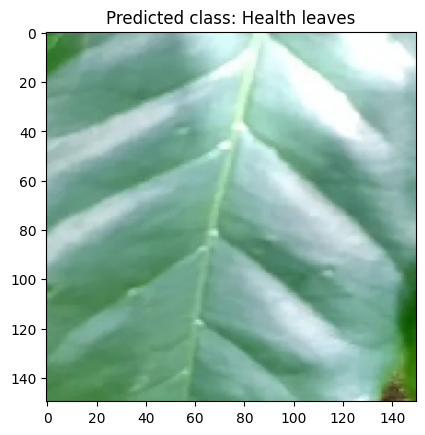

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted class: Health leaves


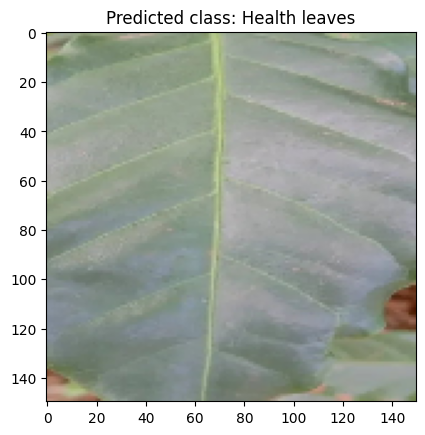

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Predicted class: Health leaves


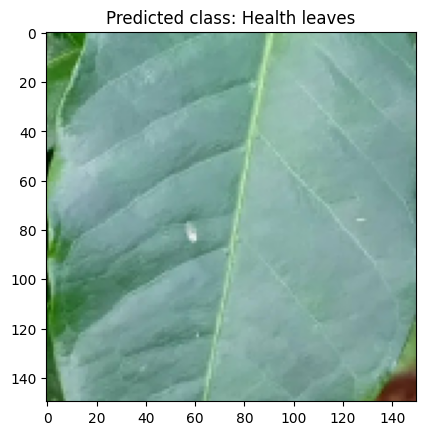

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicted class: Health leaves


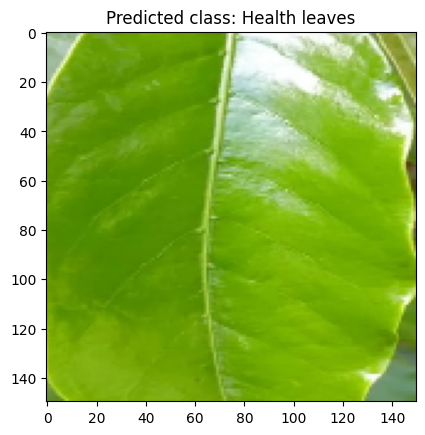

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted class: Health leaves


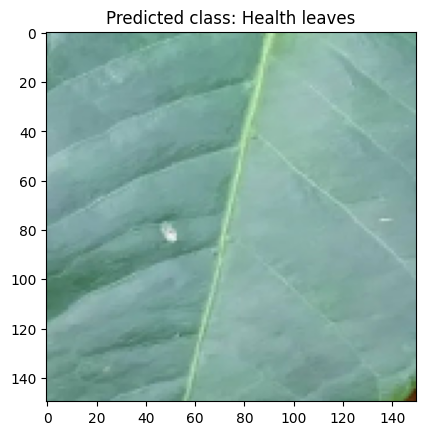

In [ ]:
# Testing the model with a random image from the 'leaf rust' folder.

import matplotlib.pyplot as plt
import numpy as np
import random
import os
import cv2
from tensorflow.keras.preprocessing import image

# Define the path to the 'leaf rust' folder
leaf_rust_folder = '/content/drive/MyDrive/coffee dataset/Health leaves'

# Get a list of image files in the 'leaf rust' folder
image_files = [f for f in os.listdir(leaf_rust_folder) if f.endswith('.jpeg') or f.endswith('.jpg')]

# Select a random image file
for i in range(5):
  random_image_file = random.choice(image_files)

  # Construct the full path to the image
  image_path = os.path.join(leaf_rust_folder, random_image_file)

  # Load and preprocess the image
  img = image.load_img(image_path, target_size=(150, 150))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0  # Normalize the image

  # Make a prediction using the model
  prediction = model.predict(img_array)

  # Get the predicted class
  predicted_class_index = np.argmax(prediction)
  class_labels = list(train_generator.class_indices.keys())
  predicted_class = class_labels[predicted_class_index]

  # Display the results
  print(f"Predicted class: {predicted_class}")
  plt.imshow(img)
  plt.title(f"Predicted class: {predicted_class}")
  plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class: leaf rust


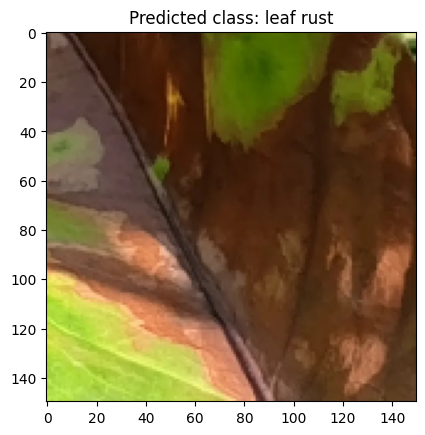

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted class: leaf rust


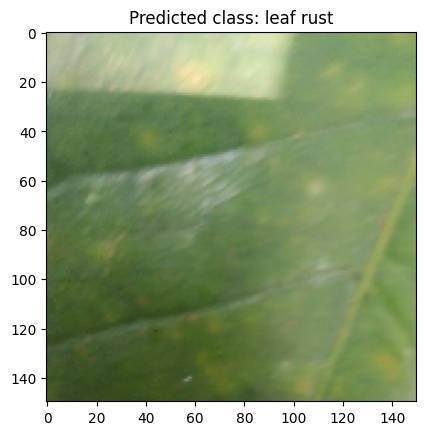

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted class: leaf rust


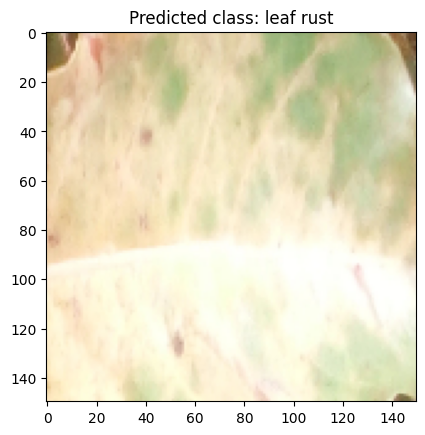

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted class: leaf rust


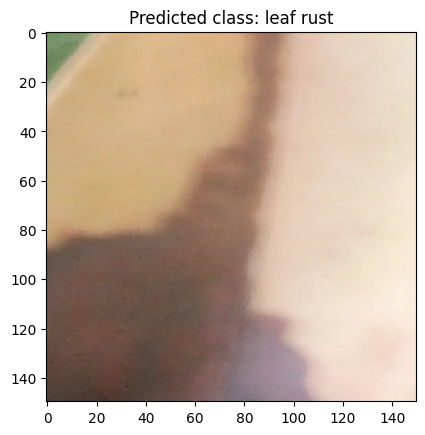

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted class: leaf rust


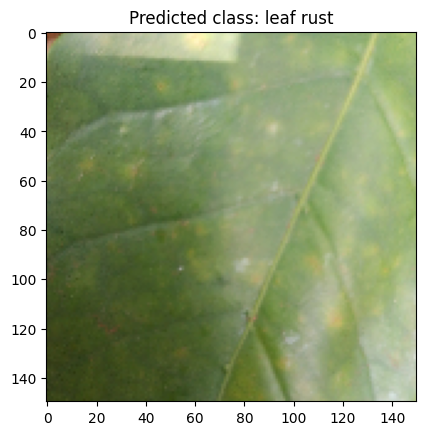

In [ ]:
# Testing the model with a random image from the 'leaf rust' folder.

import matplotlib.pyplot as plt
import numpy as np
import random
import os
import cv2
from tensorflow.keras.preprocessing import image

# Define the path to the 'leaf rust' folder
leaf_rust_folder = '/content/drive/MyDrive/coffee dataset/leaf rust'

# Get a list of image files in the 'leaf rust' folder
image_files = [f for f in os.listdir(leaf_rust_folder) if f.endswith('.jpeg') or f.endswith('.jpg')]

# Select a random image file
for i in range(5):
  random_image_file = random.choice(image_files)

  # Construct the full path to the image
  image_path = os.path.join(leaf_rust_folder, random_image_file)

  # Load and preprocess the image
  img = image.load_img(image_path, target_size=(150, 150))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0  # Normalize the image

  # Make a prediction using the model
  prediction = model.predict(img_array)

  # Get the predicted class
  predicted_class_index = np.argmax(prediction)
  class_labels = list(train_generator.class_indices.keys())
  predicted_class = class_labels[predicted_class_index]

  # Display the results
  print(f"Predicted class: {predicted_class}")
  plt.imshow(img)
  plt.title(f"Predicted class: {predicted_class}")
  plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted class: phoma


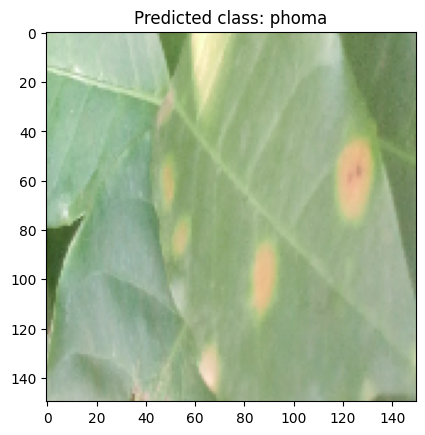

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Predicted class: phoma


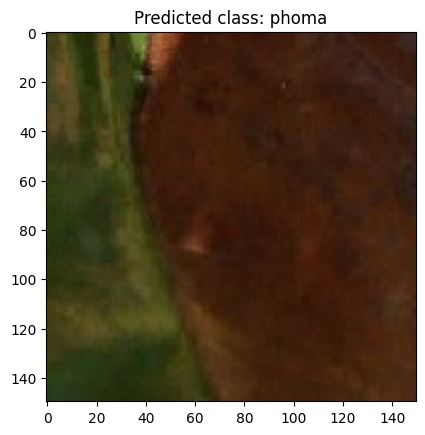

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class: phoma


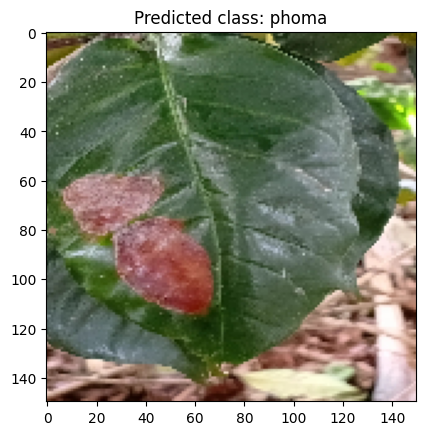

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted class: phoma


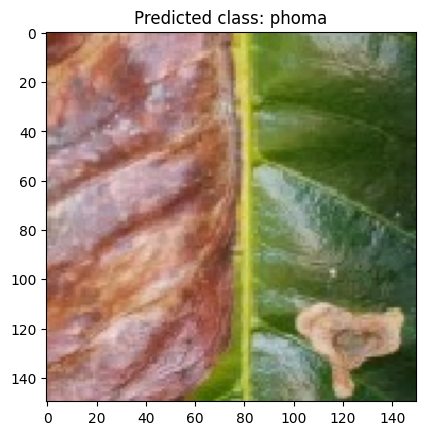

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted class: phoma


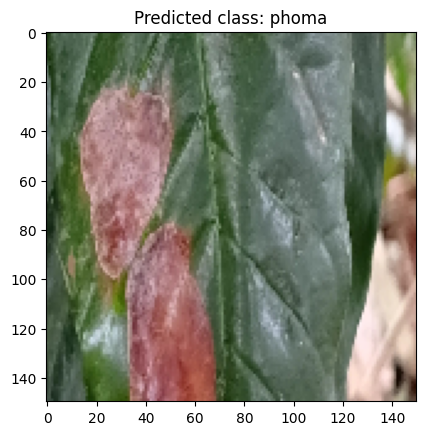

In [ ]:
# Testing the model with a random image from the 'leaf rust' folder.

import matplotlib.pyplot as plt
import numpy as np
import random
import os
import cv2
from tensorflow.keras.preprocessing import image

# Define the path to the 'leaf rust' folder
leaf_rust_folder = '/content/drive/MyDrive/coffee dataset/phoma'

# Get a list of image files in the 'leaf rust' folder
image_files = [f for f in os.listdir(leaf_rust_folder) if f.endswith('.jpeg') or f.endswith('.jpg')]

# Select a random image file
for i in range(5):
  random_image_file = random.choice(image_files)

  # Construct the full path to the image
  image_path = os.path.join(leaf_rust_folder, random_image_file)

  # Load and preprocess the image
  img = image.load_img(image_path, target_size=(150, 150))
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0  # Normalize the image

  # Make a prediction using the model
  prediction = model.predict(img_array)

  # Get the predicted class
  predicted_class_index = np.argmax(prediction)
  class_labels = list(train_generator.class_indices.keys())
  predicted_class = class_labels[predicted_class_index]

  # Display the results
  print(f"Predicted class: {predicted_class}")
  plt.imshow(img)
  plt.title(f"Predicted class: {predicted_class}")
  plt.show()


Downloading...
From (original): https://drive.google.com/uc?id=1-7jbHuoXVTdscWuFPlLb7hukER5YMONH
From (redirected): https://drive.google.com/uc?id=1-7jbHuoXVTdscWuFPlLb7hukER5YMONH&confirm=t&uuid=0adb2ae0-c31d-40e9-8f24-9b5bf7cad70c
To: /content/coffee_model.keras
100%|██████████| 58.0M/58.0M [00:00<00:00, 90.0MB/s]
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Saving IMG 1 2024 (33).jpg to IMG 1 2024 (33).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step
Predicted class: phoma


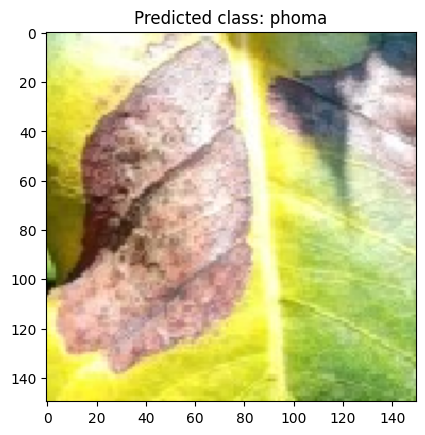

In [ ]:

from google.colab import files
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import gdown

# Get the Google Drive file ID from the shareable link
file_id = '1-7jbHuoXVTdscWuFPlLb7hukER5YMONH'  # Extract the ID from the link

# Download the model file to Colab
output_path = '/content/coffee_model.keras'  # Specify a local path
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_path, quiet=False)

# Now load the model from the local path
model = load_model(output_path)

# Function to classify an uploaded image
def classify_image(uploaded_file):
  try:
    path = '/content/' + list(uploaded_file.keys())[0]
    img = image.load_img(path, target_size=(150, 150))  # Assuming your model uses this input size
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.0

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    predicted_class_index = np.argmax(classes[0])
    class_labels = ['Health leaves', 'leaf rust', 'phoma']  # Replace with your actual class labels
    predicted_class = class_labels[predicted_class_index]

    print(f"Predicted class: {predicted_class}")
    plt.imshow(img)
    plt.title(f"Predicted class: {predicted_class}")
    plt.show()
  except Exception as e:
    print(f"Error classifying image: {e}")

# Interface for uploading images and classification
uploaded = files.upload()
if uploaded:
  classify_image(uploaded)


In [ ]:

from google.colab import files
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import gdown

# Get the Google Drive file ID from the shareable link
file_id = '1-7jbHuoXVTdscWuFPlLb7hukER5YMONH'  # Extract the ID from the link

# Download the model file to Colab
output_path = '/content/coffee_model.keras'  # Specify a local path
gdown.download(f'https://drive.google.com/uc?id={file_id}', output_path, quiet=False)

# Now load the model from the local path
model = load_model(output_path)

# Function to classify an uploaded image
def classify_image(uploaded_file):
  try:
    path = '/content/' + list(uploaded_file.keys())[0]
    img = image.load_img(path, target_size=(150, 150))  # Assuming your model uses this input size
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255.0

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)

    predicted_class_index = np.argmax(classes[0])
    class_labels = ['Health leaves', 'leaf rust', 'phoma']  # Replace with your actual class labels
    predicted_class = class_labels[predicted_class_index]

    print(f"Predicted class: {predicted_class}")
    plt.imshow(img)
    plt.title(f"Predicted class: {predicted_class}")
    plt.show()
  except Exception as e:
    print(f"Error classifying image: {e}")

# Interface for uploading images and classification
uploaded = files.upload()
if uploaded:
  classify_image(uploaded)


Downloading...
From (original): https://drive.google.com/uc?id=1-7jbHuoXVTdscWuFPlLb7hukER5YMONH
From (redirected): https://drive.google.com/uc?id=1-7jbHuoXVTdscWuFPlLb7hukER5YMONH&confirm=t&uuid=1041ed0e-ff75-4a09-b011-4c840b2bf620
To: /content/coffee_model.keras
100%|██████████| 58.0M/58.0M [00:00<00:00, 105MB/s]


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report

# Path to the coffee leaf dataset
data_dir = '/content/drive/MyDrive/coffee dataset'

# Data Generators with Train-Validation Split
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Load VGG19 without the top layers
vgg19_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the VGG19 layers
for layer in vgg19_base.layers:
    layer.trainable = False

# Build the model
model = Sequential([
    vgg19_base,
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=5,  # Use more epochs for better results
    validation_data=val_generator
)

# Evaluate on the validation data
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Predictions on the validation data
y_pred = model.predict(val_generator)
y_pred_classes = y_pred.argmax(axis=1)
y_true = val_generator.classes

# Generate Classification Report
class_labels = list(val_generator.class_indices.keys())
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))


Found 1353 images belonging to 3 classes.
Found 337 images belonging to 3 classes.
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 1688s 38s/step - accuracy: 0.5373 - loss: 1.2997 - val_accuracy: 0.8398 - val_loss: 0.4107
Epoch 2/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 1589s 36s/step - accuracy: 0.8146 - loss: 0.5106 - val_accuracy: 0.9525 - val_loss: 0.1670
Epoch 3/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 1543s 36s/step - accuracy: 0.9106 - loss: 0.2150 - val_accuracy: 0.9525 - val_loss: 0.1389
Epoch 4/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 1508s 36s/step - accuracy: 0.9448 - loss: 0.1456 - val_accuracy: 0.9703 - val_loss: 0.1021
Epoch 5/5
43/43 ━━━━━━━━━━━━━━━━━━━━ 1561s 36s/step - accuracy: 0.9512 - loss: 0.1354 - val_accuracy: 0.9674 - val_loss: 0.0945
11/11 ━━━━━━━━━━━━━━━━━━━━ 280s 25s/step - accuracy: 0.9550 - loss: 0.1201
Validation Accuracy: 96.74%
11/11 ━━━━━━━━━━━━━━━━━━━━ 279s 25s/step

Classification Report:
               precision    recall  f1-score   support

Health leaves       0.31      0.30      0.31       104
    leaf rust       0.34      0.34      0.34       113
        phoma       0.41      0.42  

Found 1353 images belonging to 3 classes.
Found 337 images belonging to 3 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 603s 13s/step - accuracy: 0.3513 - loss: 2.7849 - val_accuracy: 0.3650 - val_loss: 1.1864
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 605s 13s/step - accuracy: 0.4587 - loss: 1.0818 - val_accuracy: 0.6113 - val_loss: 0.9897
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 455s 11s/step - accuracy: 0.4796 - loss: 1.0194 - val_accuracy: 0.3947 - val_loss: 0.9969
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 442s 10s/step - accuracy: 0.4327 - loss: 1.0240 - val_accuracy: 0.4332 - val_loss: 1.0158
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 445s 10s/step - accuracy: 0.4358 - loss: 1.0374 - val_accuracy: 0.4006 - val_loss: 0.9912
11/11 ━━━━━━━━━━━━━━━━━━━━ 70s 6s/step - accuracy: 0.6010 - loss: 0.9852
Validation Accuracy: 61.13%
11/11 ━━━━━━━━━━━━━━━━━━━━ 75s 7s/step

Classification Report:
               precision    recall  f1-score   support

Health leaves       0.30      0.27      0.28       104
    leaf rust       0.38      0.12      0.19       113
        phoma       0.34      0.58      0

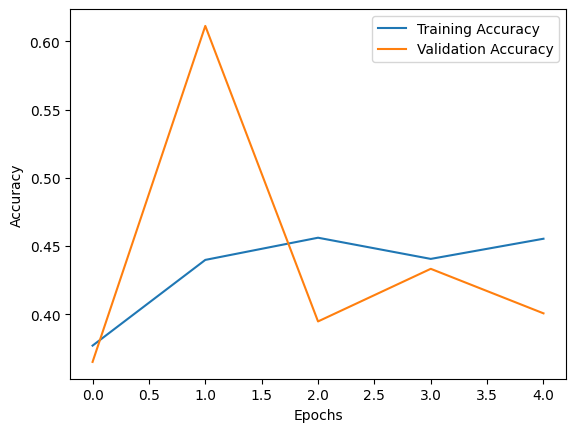

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# Path to the coffee leaf dataset
data_dir = '/content/drive/MyDrive/coffee dataset'

# Data Generators with Train-Validation Split
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Load ResNet50 without the top layers
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the ResNet50 layers
for layer in resnet_base.layers:
    layer.trainable = False

# Build the model
model = Sequential([
    resnet_base,
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks for early stopping and model checkpointing
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_resnet_model.keras', save_best_only=True, monitor='val_accuracy')

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate on the validation data
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Predictions on the validation data
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.concatenate([val_generator[i][1] for i in range(len(val_generator))]).argmax(axis=1)

# Generate Classification Report
class_labels = list(val_generator.class_indices.keys())
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Plotting training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Found 1353 images belonging to 3 classes.
Found 337 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


43/43 ━━━━━━━━━━━━━━━━━━━━ 384s 9s/step - accuracy: 0.6994 - loss: 0.7629 - val_accuracy: 0.3353 - val_loss: 1.1155
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 297s 7s/step - accuracy: 0.9109 - loss: 0.2749 - val_accuracy: 0.3086 - val_loss: 1.4654
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 294s 7s/step - accuracy: 0.9424 - loss: 0.2095 - val_accuracy: 0.3353 - val_loss: 2.6758
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 340s 7s/step - accuracy: 0.9533 - loss: 0.2271 - val_accuracy: 0.3353 - val_loss: 1.8443
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.3400 - loss: 1.1230
Validation Accuracy: 33.53%
11/11 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step

Classification Report:
               precision    recall  f1-score   support

Health leaves       0.00      0.00      0.00       104
    leaf rust       0.34      1.00      0.50       113
        phoma       0.00      0.00      0.00       120

     accuracy                           0.34       337
    macro avg       0.11      0.33      0.17       337
 weight

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


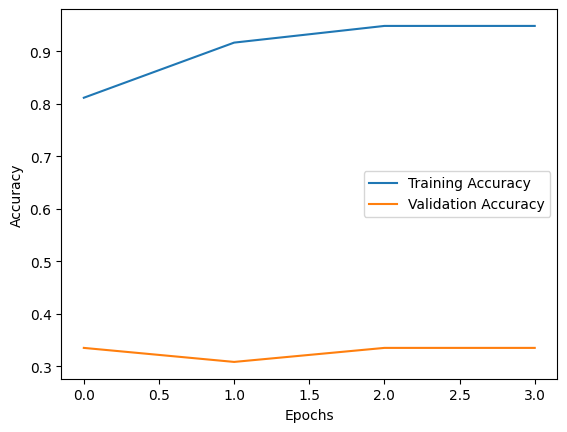

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# Path to the coffee leaf dataset
data_dir = '/content/drive/MyDrive/coffee dataset'

# Data Generators with Train-Validation Split
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(227, 227),  # AlexNet uses 227x227 input size
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(227, 227),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Build the AlexNet model
model = Sequential([
    # 1st Convolutional Layer
    Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(227, 227, 3)),
    MaxPooling2D((3, 3), strides=2),
    BatchNormalization(),

    # 2nd Convolutional Layer
    Conv2D(256, (5, 5), padding='same', activation='relu'),
    MaxPooling2D((3, 3), strides=2),
    BatchNormalization(),

    # 3rd, 4th, and 5th Convolutional Layers
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    Conv2D(384, (3, 3), padding='same', activation='relu'),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((3, 3), strides=2),
    BatchNormalization(),

    # Flatten and Fully Connected Layers
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks for early stopping and model checkpointing
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_resnet_model.keras', save_best_only=True, monitor='val_accuracy')

# Model training
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=[early_stopping, model_checkpoint]
)

# Evaluate on the validation data
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Predictions
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.concatenate([val_generator[i][1] for i in range(len(val_generator))]).argmax(axis=1)

# Classification Report
class_labels = list(val_generator.class_indices.keys())
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Plotting training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
#Random forest code
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from tqdm import tqdm  # For progress bar

# Path to the coffee leaf dataset
data_dir = '/content/drive/MyDrive/coffee dataset'

# Data Generators for loading images
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=False
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Load VGG19 for feature extraction (without the top layers)
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Function to extract features from a generator
def extract_features(generator, model):
    features = []
    labels = []
    for inputs, targets in tqdm(generator):
        # Extract features for each batch
        batch_features = model.predict(inputs)
        batch_features = batch_features.reshape(batch_features.shape[0], -1)  # Flatten
        features.append(batch_features)
        labels.append(np.argmax(targets, axis=1))  # Convert one-hot to class indices

    return np.concatenate(features), np.concatenate(labels)

# Extract features from the training and validation data
X_train, y_train = extract_features(train_generator, vgg19)
X_val, y_val = extract_features(val_generator, vgg19)

print(f"Training Features Shape: {X_train.shape}, Training Labels Shape: {y_train.shape}")
print(f"Validation Features Shape: {X_val.shape}, Validation Labels Shape: {y_val.shape}")

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the validation data
y_pred = rf_model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

# Generate classification report
class_labels = list(val_generator.class_indices.keys())
print("\nClassification Report:")
print(classification_report(y_val, y_pred, target_names=class_labels))


Found 1353 images belonging to 3 classes.
Found 337 images belonging to 3 classes.


  0%|          | 0/43 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


  2%|▏         | 1/43 [00:28<19:55, 28.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


  5%|▍         | 2/43 [01:09<24:33, 35.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


  7%|▋         | 3/43 [01:50<25:33, 38.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


  9%|▉         | 4/43 [02:32<25:39, 39.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


 12%|█▏        | 5/43 [03:13<25:23, 40.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


 14%|█▍        | 6/43 [03:54<24:58, 40.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


 16%|█▋        | 7/43 [04:35<24:26, 40.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


 19%|█▊        | 8/43 [05:02<21:06, 36.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


 21%|██        | 9/43 [05:43<21:26, 37.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


 23%|██▎       | 10/43 [06:24<21:23, 38.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


 26%|██▌       | 11/43 [07:06<21:06, 39.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


 28%|██▊       | 12/43 [07:47<20:43, 40.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


 30%|███       | 13/43 [08:28<20:16, 40.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


 33%|███▎      | 14/43 [08:53<17:19, 35.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


 35%|███▍      | 15/43 [09:35<17:33, 37.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


 37%|███▋      | 16/43 [10:03<15:34, 34.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


 40%|███▉      | 17/43 [10:28<13:42, 31.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


 42%|████▏     | 18/43 [10:54<12:33, 30.14s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


 44%|████▍     | 19/43 [11:19<11:23, 28.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


 47%|████▋     | 20/43 [12:01<12:29, 32.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


 49%|████▉     | 21/43 [12:42<12:56, 35.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


 51%|█████     | 22/43 [13:24<13:02, 37.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


 53%|█████▎    | 23/43 [14:06<12:50, 38.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


 56%|█████▌    | 24/43 [14:48<12:32, 39.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


 58%|█████▊    | 25/43 [15:29<12:01, 40.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


 60%|██████    | 26/43 [15:54<10:03, 35.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


 63%|██████▎   | 27/43 [16:21<08:46, 32.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


 65%|██████▌   | 28/43 [17:03<08:54, 35.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


 67%|██████▋   | 29/43 [17:45<08:44, 37.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


 70%|██████▉   | 30/43 [18:26<08:21, 38.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


 72%|███████▏  | 31/43 [19:07<07:52, 39.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


 74%|███████▍  | 32/43 [19:32<06:24, 34.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


 77%|███████▋  | 33/43 [20:13<06:09, 36.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


 79%|███████▉  | 34/43 [20:54<05:44, 38.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


 81%|████████▏ | 35/43 [21:36<05:13, 39.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


 84%|████████▎ | 36/43 [22:00<04:03, 34.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


 86%|████████▌ | 37/43 [22:27<03:14, 32.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


 88%|████████▊ | 38/43 [23:09<02:55, 35.15s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


 91%|█████████ | 39/43 [23:33<02:07, 31.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


 93%|█████████▎| 40/43 [24:15<01:44, 34.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


 95%|█████████▌| 41/43 [24:41<01:04, 32.32s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


 98%|█████████▊| 42/43 [25:23<00:35, 35.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


100%|██████████| 43/43 [25:31<00:00, 26.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


44it [26:12, 31.24s/it]                        

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


45it [26:37, 29.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


46it [27:04, 28.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


47it [27:28, 27.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


48it [27:55, 27.15s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


49it [28:21, 26.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


50it [29:02, 31.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


51it [29:43, 34.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


52it [30:08, 31.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


53it [30:34, 29.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


54it [31:01, 28.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


55it [31:25, 27.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


56it [32:07, 31.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


57it [32:49, 34.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


58it [33:14, 31.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


59it [33:56, 35.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


60it [34:24, 32.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


61it [34:48, 30.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


62it [35:30, 33.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


63it [36:12, 36.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


64it [36:53, 37.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


65it [37:35, 39.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


66it [38:17, 39.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


67it [38:42, 35.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


68it [39:09, 32.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


69it [39:35, 30.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


70it [40:16, 34.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


71it [40:44, 32.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


72it [41:26, 34.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


73it [42:07, 36.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


74it [42:48, 38.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


75it [43:13, 34.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


76it [43:54, 36.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


77it [44:36, 37.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


78it [45:00, 33.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


79it [45:27, 31.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


80it [46:08, 34.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


81it [46:49, 36.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


82it [47:14, 33.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


83it [47:55, 35.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


84it [48:37, 37.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


85it [49:18, 38.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


86it [49:24, 28.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


87it [49:51, 28.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


88it [50:15, 26.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


89it [50:41, 26.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


90it [51:06, 26.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


91it [51:47, 30.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


92it [52:14, 29.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


93it [52:38, 27.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


94it [53:20, 31.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


95it [53:46, 30.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


96it [54:11, 28.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


97it [54:52, 32.44s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


98it [55:17, 30.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


99it [55:44, 29.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


100it [56:26, 33.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


101it [57:08, 35.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


102it [57:33, 32.50s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


103it [58:00, 30.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


104it [58:25, 29.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


105it [59:07, 32.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


106it [59:49, 35.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


107it [1:00:30, 37.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


108it [1:00:55, 33.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


109it [1:01:37, 36.09s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


110it [1:02:19, 37.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


111it [1:02:44, 33.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


112it [1:03:25, 36.21s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


113it [1:04:07, 37.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


114it [1:04:32, 34.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


115it [1:04:59, 31.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


116it [1:05:25, 30.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


117it [1:06:06, 33.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


118it [1:06:48, 35.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


119it [1:07:15, 33.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


120it [1:07:56, 35.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


121it [1:08:21, 32.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


122it [1:08:48, 30.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


123it [1:09:13, 28.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


124it [1:09:54, 32.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


125it [1:10:21, 30.98s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


126it [1:11:03, 34.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


127it [1:11:44, 36.26s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


128it [1:12:25, 37.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


129it [1:12:36, 29.55s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


130it [1:13:02, 28.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


131it [1:13:43, 32.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


132it [1:14:24, 35.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


133it [1:15:06, 36.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


134it [1:15:30, 33.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


135it [1:16:11, 35.52s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


136it [1:16:52, 37.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


137it [1:17:17, 33.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 29s 29s/step


138it [1:17:58, 35.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


139it [1:18:24, 32.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


140it [1:19:05, 35.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


141it [1:19:47, 37.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


142it [1:20:13, 33.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


143it [1:20:55, 36.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


144it [1:21:20, 33.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


145it [1:22:02, 35.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


146it [1:22:28, 32.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


147it [1:23:10, 35.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


148it [1:23:37, 32.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


149it [1:24:19, 35.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


150it [1:25:00, 37.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


151it [1:25:25, 33.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


152it [1:26:07, 36.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


153it [1:26:34, 33.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 28s 28s/step


154it [1:27:03, 31.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


155it [1:27:44, 34.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


156it [1:28:26, 36.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


157it [1:29:08, 38.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


158it [1:29:49, 39.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


159it [1:30:31, 39.91s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


160it [1:30:55, 35.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


161it [1:31:22, 32.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


162it [1:31:47, 30.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


163it [1:32:29, 33.85s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


164it [1:33:10, 36.10s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


165it [1:33:52, 37.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


166it [1:34:33, 38.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


167it [1:34:58, 34.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


168it [1:35:25, 32.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


169it [1:35:50, 30.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


170it [1:36:16, 28.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


171it [1:36:43, 28.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


172it [1:36:49, 21.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


173it [1:37:16, 23.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


174it [1:37:40, 23.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


175it [1:38:07, 24.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


176it [1:38:32, 24.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


177it [1:38:59, 25.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


178it [1:39:40, 30.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


179it [1:40:04, 28.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


180it [1:40:31, 27.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


181it [1:41:12, 31.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


182it [1:41:36, 29.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


183it [1:42:04, 28.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


184it [1:42:29, 27.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


185it [1:42:55, 27.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


186it [1:43:22, 27.25s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


187it [1:43:47, 26.56s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


188it [1:44:15, 26.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


189it [1:44:56, 31.27s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


190it [1:45:38, 34.28s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


191it [1:46:03, 31.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


192it [1:46:30, 30.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


193it [1:47:12, 33.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


194it [1:47:54, 36.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


195it [1:48:35, 37.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


196it [1:49:00, 34.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


197it [1:49:42, 36.22s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


198it [1:50:09, 33.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


199it [1:50:51, 35.93s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


200it [1:51:32, 37.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


201it [1:52:14, 38.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


202it [1:52:55, 39.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


203it [1:53:37, 40.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


204it [1:54:18, 40.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


205it [1:55:00, 40.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


206it [1:55:27, 36.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


207it [1:55:52, 33.17s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


208it [1:56:33, 35.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


209it [1:57:00, 33.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


210it [1:57:42, 35.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


211it [1:58:06, 32.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


212it [1:58:33, 30.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


213it [1:59:15, 33.88s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


214it [1:59:39, 31.06s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


215it [1:59:48, 24.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


216it [2:00:29, 29.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


217it [2:01:10, 32.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


218it [2:01:51, 35.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


219it [2:02:33, 37.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


220it [2:03:14, 38.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


221it [2:03:41, 34.95s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


222it [2:04:05, 31.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


223it [2:04:46, 34.60s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


224it [2:05:28, 36.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


225it [2:06:09, 38.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


226it [2:06:50, 38.96s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


227it [2:07:32, 39.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


228it [2:07:56, 35.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


229it [2:08:38, 37.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


230it [2:09:04, 33.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


231it [2:09:29, 31.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


232it [2:09:57, 30.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


233it [2:10:38, 33.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


234it [2:11:03, 30.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


235it [2:11:44, 34.12s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


236it [2:12:26, 36.37s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


237it [2:12:51, 32.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


238it [2:13:18, 31.15s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


239it [2:14:00, 34.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


240it [2:14:41, 36.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


241it [2:15:06, 32.92s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


242it [2:15:33, 31.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


243it [2:16:00, 29.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


244it [2:16:25, 28.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


245it [2:17:06, 32.33s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


246it [2:17:48, 35.02s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


247it [2:18:12, 31.86s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


248it [2:18:54, 34.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


249it [2:19:21, 32.36s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


250it [2:20:02, 35.07s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


251it [2:20:43, 36.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


252it [2:21:25, 38.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


253it [2:21:51, 34.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


254it [2:22:17, 32.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


255it [2:22:42, 29.94s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


256it [2:23:23, 33.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


257it [2:23:48, 30.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


258it [2:23:56, 24.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


259it [2:24:37, 29.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


260it [2:25:02, 27.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


261it [2:25:43, 31.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


262it [2:26:09, 30.04s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


263it [2:26:50, 33.40s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


264it [2:27:15, 30.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


265it [2:27:42, 29.58s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


266it [2:28:06, 28.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


267it [2:28:47, 32.00s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


268it [2:29:12, 29.80s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


269it [2:29:38, 28.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


270it [2:30:19, 32.48s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


271it [2:30:44, 30.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


272it [2:31:26, 33.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


273it [2:32:08, 36.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


274it [2:32:34, 33.11s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


275it [2:33:16, 35.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


276it [2:33:42, 32.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


277it [2:34:08, 30.79s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


278it [2:34:34, 29.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


279it [2:35:16, 33.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


280it [2:35:42, 30.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


281it [2:36:23, 34.13s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


282it [2:37:05, 36.54s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


283it [2:37:32, 33.49s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


284it [2:37:57, 30.87s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


285it [2:38:24, 29.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


286it [2:39:06, 33.39s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 23s 23s/step


287it [2:39:30, 30.61s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


288it [2:39:57, 29.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


289it [2:40:38, 33.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


290it [2:41:02, 30.35s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


291it [2:41:44, 33.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


292it [2:42:10, 31.65s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


293it [2:42:35, 29.47s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


294it [2:43:16, 33.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


295it [2:43:57, 35.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


296it [2:44:22, 32.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


297it [2:44:48, 30.45s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


298it [2:45:14, 29.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


299it [2:45:39, 27.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


300it [2:46:06, 27.64s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


301it [2:46:17, 22.46s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


302it [2:46:58, 28.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


303it [2:47:24, 27.63s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


304it [2:48:08, 32.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


305it [2:48:49, 35.05s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


306it [2:49:30, 36.90s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


307it [2:50:12, 38.20s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


308it [2:50:36, 34.01s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


309it [2:51:03, 31.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


310it [2:51:27, 29.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


311it [2:51:53, 28.59s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


312it [2:52:19, 27.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


313it [2:52:44, 26.99s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


314it [2:53:26, 31.34s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


315it [2:53:51, 29.41s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


316it [2:54:33, 33.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


317it [2:55:15, 35.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


318it [2:55:41, 32.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


319it [2:56:06, 30.53s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step


320it [2:56:47, 33.84s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


321it [2:57:12, 31.24s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


322it [2:57:39, 29.89s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


323it [2:58:06, 29.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step


324it [2:58:31, 27.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step


325it [2:59:13, 32.03s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


326it [2:59:38, 30.02s/it]